In [70]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

max_iter = 100

In [71]:
def changes_sign(function, left_bound, right_bound):
    return function(left_bound) * function(right_bound) < 0

def plot_on_interval(f, a, b, current_x):
    x = np.linspace(a, b, 100)
    y = f(x)

    fig, ax = plt.subplots()

    plt.plot(x, y)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(current_x, color='red', lw=1)
    ax.axvline(0, color='black', lw=1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    return ax

def det(A):
    return A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]

In [72]:
def check_converging(x0):
    if f(x0) * df2(x0) < df(x0) ** 2:
        return True
    return False

def newton(f, df, lbound, rbound, eps):
    if not changes_sign(f, lbound, rbound):
        raise Exception("Функция не меняет знак на заданном отрезке")

    iterations = 0
    x0 = rbound
    if not check_converging(x0):
        return

    while iterations < max_iter:
        iterations += 1
        x = x0 - f(x0) / df(x0)
        if abs(x - x0) < eps:
            return x, iterations
        x0 = x

    raise Exception("Метод Ньютона не смог сойтись при заданном x0, нужно выбрать интервал, на котором произведение первой и второй производных положительно")


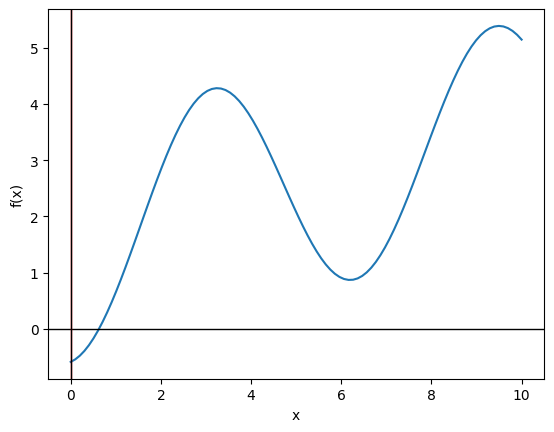

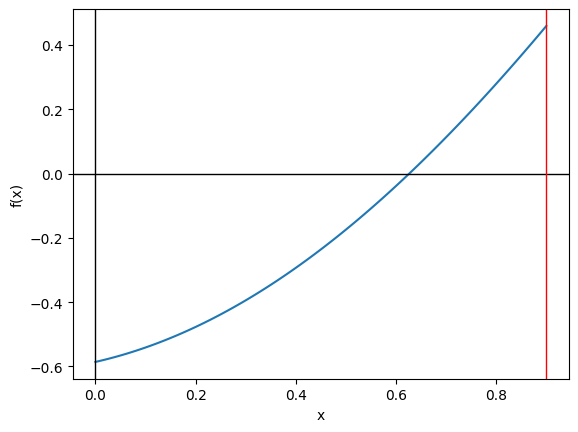

/var/folders/mq/9q2vjj_172lfbx6jstv875qm0000gq/T/ipykernel_25077/4161074760.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x + 2) - 2 * np.cos(x)


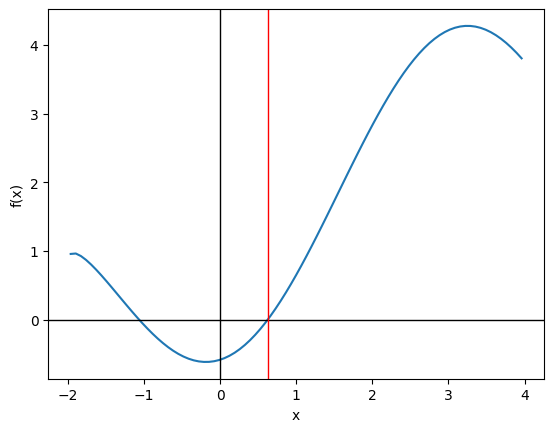

x = 0.6281541646346618, iterations = 3


In [73]:
def f(x):
    return np.sqrt(x + 2) - 2 * np.cos(x)

def df(x):
    return 2*np.sin(x) + 1 / np.sqrt(x + 2)

def df2(x):
     return 2*np.cos(x) - 1 / (2 * np.power(x+2, 3/2))

plot_on_interval(f, 0, 10, 0)
lbound = 0
rbound = 0.9
plot_on_interval(f, lbound, rbound, rbound)


x, iterations = newton(f, df, lbound, rbound, 1e-2)

plot_on_interval(f, x - 10 / iterations, x + 10 / iterations, x)
print("x = {0}, iterations = {1}".format(x, iterations))

In [74]:
def phi(x):
    return 2* np.cos(x) - np.sqrt(x+2) + x

def d_phi(x):
    return 1/2 * (-4 * np.sin(x) + 2 - 1/np.sqrt(x+2))

def iterations(f, df, lbound, rbound, eps):
    if not changes_sign(f, lbound, rbound):
        raise Exception("Функция не меняет знак на заданном отрезке")

    iterations = 0
    x0 = rbound if d_phi(rbound) > 0 else lbound
    if d_phi(x0) < 0:
        raise Exception("Производная итерирующей функции меньше нуля на заданном отрезке")

    while iterations < max_iter:
        iterations += 1
        x = phi(x0)
        if abs(x - x0) < eps:
            return x, iterations
        x0 = x

    raise Exception("Метод итераций не смог сойтись при заданном x0")

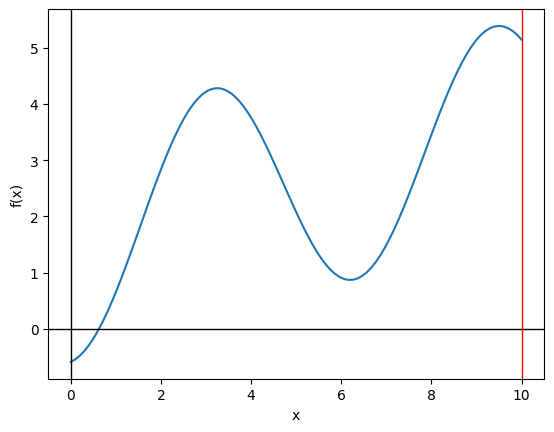

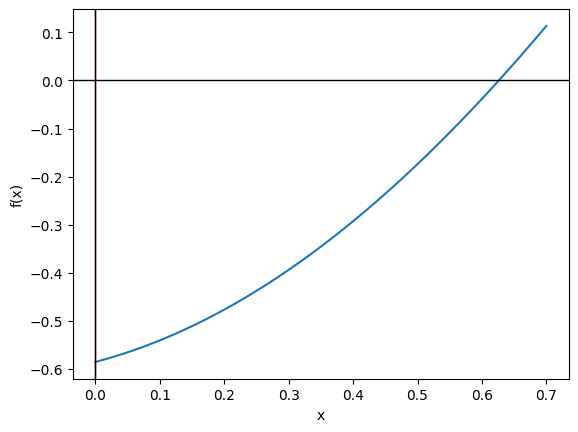

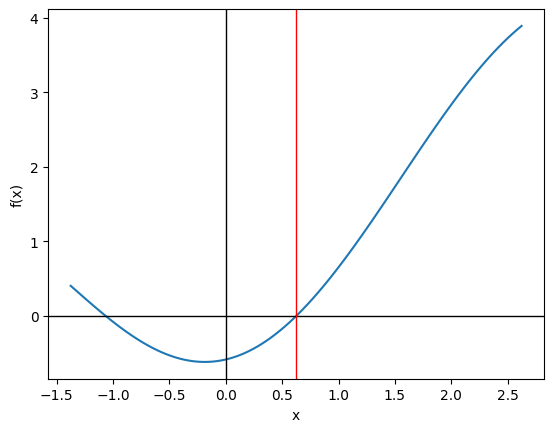

x = 0.6241210697839272, iterations = 5


In [75]:
lbound = 0
rbound = 0.7
plot_on_interval(f, 0, 10, current_x=10)
plot_on_interval(f, lbound, rbound, current_x=0)
x, iterations = iterations(f, df, lbound, rbound, 1e-2)
plot_on_interval(f, x - 10 / iterations, x + 10 / iterations, x)
print("x = {0}, iterations = {1}".format(x, iterations))

# Системы нелинейных уравнений

## Метод Ньютона

In [76]:
def f1(x, y):
    return x**2 - y + y**2 - 1

def f2(x, y):
    return x - np.sqrt(y + 1) + 1

def d_f1_x(x):
    return 2*x

def d_f1_y(y):
    return 2*y - 1

def d_f2_x():
    return 1

def d_f2_y(y):
    return -1/ (2 * np.sqrt(y+1))

def j(x, y):
    return det(np.array([
        [d_f1_x(x), d_f1_y(y)],
        [d_f2_x(), d_f2_y(y)]
    ]))

def a1(x, y):
    return det(np.array([
        [f1(x, y), d_f1_y(y)],
        [f2(x, y), d_f2_y(y)]
    ]))

def a2(x, y):
    return det(np.array([
        [d_f1_x(x), f1(x, y)],
        [d_f2_x(), f2(x, y)]
    ]))

def check_converging_newton(j, x0, y0):
    if j(x0, y0) == 0:
        print('Метод не сходится, определитель якобиана равен нулю')
        return False
    return True

def is_accuracy_achieved(x, x_prev, eps):
    return np.max(np.abs(x - x_prev)) <= eps

def newton_system(initial, eps):

    if not check_converging_newton(j, initial[0], initial[1]):
        return

    iterations = 0

    while iterations < max_iter:
        iterations += 1
        x0 = initial[0]
        y0 = initial[1]
        solution = np.array(
            [x0 - a1(x0, y0) / j (x0, y0),
             y0 - a2(x0, y0) / j(x0, y0)]
        )
        if is_accuracy_achieved(solution, initial, eps):
            return solution, iterations

        initial = solution

    raise Exception("Newton method for system cannot converge")

def plot_system(f1, f2, lbound, rbound, solution):

    x_for_circle = np.linspace(-rbound, rbound, 100)
    x_for_line = np.linspace(lbound, rbound, 100)
    X, Y = np.meshgrid(x_for_circle, x_for_circle)
    circle = f1(X, Y)
    X_LINE, Y_LINE = np.meshgrid(x_for_line, x_for_line)
    line = f2(X_LINE, Y_LINE)

    fig, ax = plt.subplots()
    plt.contour(X,Y,circle,[0], colors='b')
    plt.contour(X_LINE, Y_LINE, line, [0], colors='g')

    ax.axhline(solution[1], color='red', lw=1)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(solution[0], color='red', lw=1)
    ax.axvline(0, color='black', lw=1)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

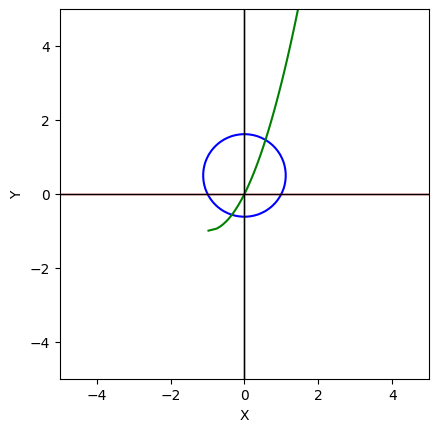

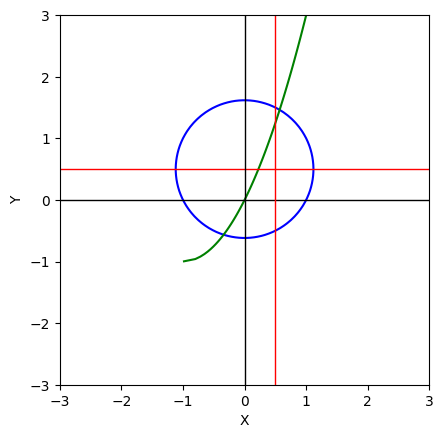

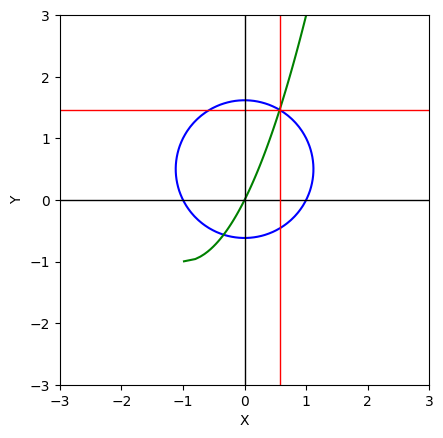

[0.569 1.462]
iterations = 7


In [77]:
lbound = -1
rbound = 3
init_solution = np.array([0.5, 0.5])
plot_system(f1, f2, -1, 5, [0, 0])
plot_system(f1, f2, lbound, rbound, init_solution)
solution, iterations = newton_system(init_solution, 1e-6)
plot_system(f1, f2, lbound, rbound, solution)
print(solution)
print("iterations = {0}".format(iterations))

## Метод итераций

In [78]:
def f1(x, y):
    return x - np.cos(y) - 1

def f2(x, y):
    return y - np.sin(x) - 1

def phi1(y):
    return np.cos(y) + 1

def phi2(x):
    return np.sin(x) + 1

def d_phi1_x():
    return 0

def d_phi1_y(y):
    return -np.sin(y)

def d_phi2_x(x):
    return np.cos(x)

def d_phi2_y():
    return 0

def check_iterations_converges(initial_solution):
    x = initial_solution[0]
    y = initial_solution[1]
    norm_phi_1 = np.abs(d_phi1_x()) + np.abs(d_phi1_y(y))
    norm_phi_2 = np.abs(d_phi2_x(x)) + np.abs(d_phi2_y())

    return np.max([norm_phi_1, norm_phi_2]) < 1

def f(solution):
    x = solution[0]
    y = solution[1]
    return np.array([f1(x, y), f2(x, y)])

# def check_converging_simple_iterations(f, x0):
#     delta_x = 1e-6
#     f_x0 = f(np.array([x0, x0]))
#     f_x0_delta = f(np.array([x0 - delta_x, x0 + delta_x]))
#     if not np.allclose(f_x0, f_x0_delta, rtol=1e-5):
#         return False
#
#     df_x0 = np.array([(f(x0 + delta_x)[0] - f(x0)[0]) / delta_x, (f(x0 + delta_x)[1] - f(x0)[1]) / delta_x])
#     df_x0_delta = np.array([(f(x0 + delta_x)[0] - f(x0 - delta_x)[0]) / (2 * delta_x),
#                             (f(x0 + delta_x)[1] - f(x0 - delta_x)[1]) / (2 * delta_x)])
#     if not np.allclose(df_x0, df_x0_delta, rtol=1e-5):
#         return False
#
#     return True

def iterations_system(initial, eps, type='Iterations'):
    if not check_iterations_converges(initial):
        print("Метод простых итераций не сойдется")
        return

    iterations = 0

    while iterations < max_iter:
        iterations += 1

        y0 = initial[1]

        if type == 'Iterations':
            x0 = initial[0]
            solution = np.array([phi1(y0),phi2(x0)])

        elif type == 'Zeidel':
            x0 = phi1(y0)
            solution = np.array([x0,phi2(x0)])

        else:
            raise Exception("No such method")
        #plot_system(f1, f2, lbound, rbound, solution)

        if is_accuracy_achieved(solution, initial, eps):
            return solution, iterations

        initial = solution

    raise Exception("Iterations method for system cannot converge")

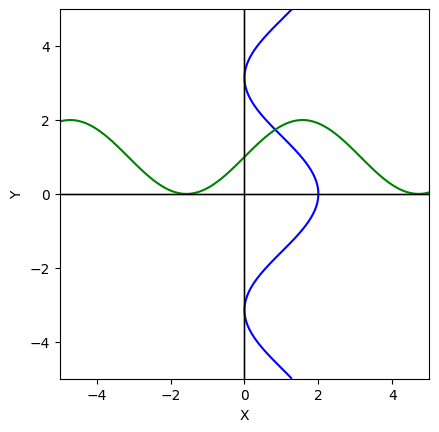

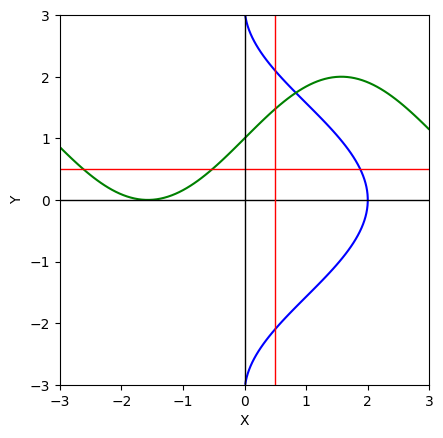

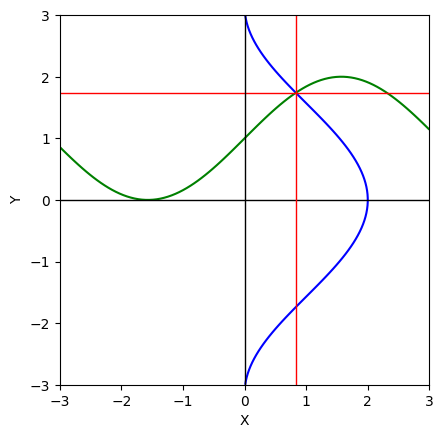

[0.836 1.743]
iterations = 22


In [79]:
lbound = -3
rbound = 3
init_solution = np.array([0.5, 0.5])
plot_system(f1, f2, -5, 5, [0, 0])
plot_system(f1, f2, lbound, rbound, init_solution)
solution, iterations = iterations_system(init_solution, 1e-2)
plot_system(f1, f2, lbound, rbound, solution)
print(solution)
print("iterations = {0}".format(iterations))

## Метод Зейделя

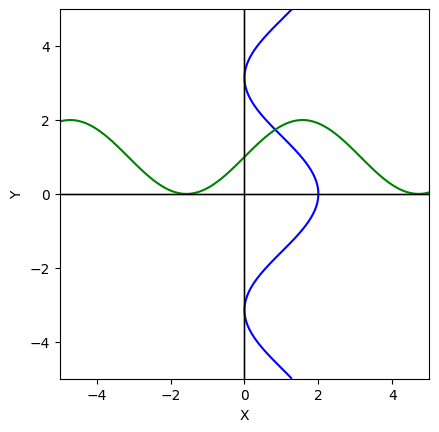

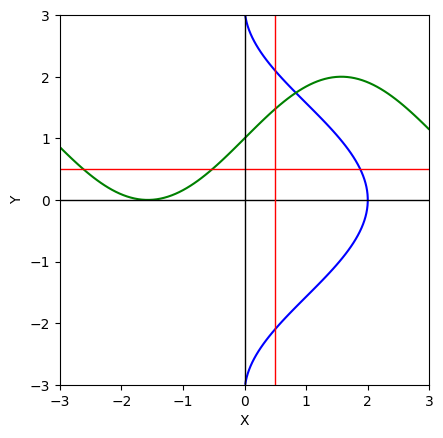

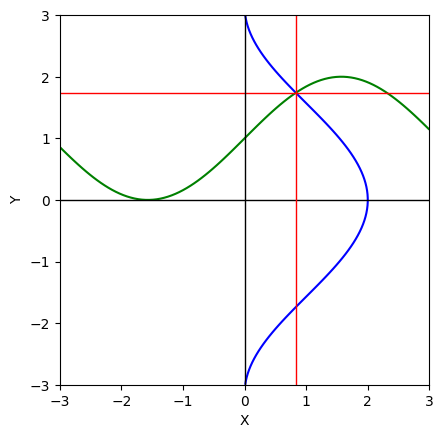

[0.829 1.737]
iterations = 12


In [80]:
lbound = -3
rbound = 3
init_solution = np.array([0.5, 0.5])
plot_system(f1, f2, -5, 5, [0, 0])
plot_system(f1, f2, lbound, rbound, init_solution)
solution, iterations = iterations_system(init_solution, 1e-2, type='Zeidel')
plot_system(f1, f2, lbound, rbound, solution)
print(solution)
print("iterations = {0}".format(iterations))